In [17]:
import pandas as pd

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
dados = pd.read_excel('testebase.xlsx')

In [60]:
dados

,paciente,febre,mialgia,cefaleia,enxantema,vomito,resultado,resultado_revisto
0,70022,2,2,2,2,2,4,2
1,100602,2,2,2,2,2,4,2
2,906917,1,2,1,2,2,4,2
3,119424,1,2,1,2,2,1,1
4,9940,1,1,1,2,2,4,2
5,40043,2,2,2,2,2,4,2
6,109,1,1,1,2,2,1,1
7,94,1,1,1,2,1,4,2
8,50901,2,2,2,2,1,4,2
9,132961,1,1,1,1,1,4,1


In [44]:
dados.replace(2, 0, inplace=True)

In [71]:
X = dados.drop(['febre', 'mialgia', 'cefaleia', 'enxantema', 'vomito'], axis=1)
y = dados['resultado_revisto']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#colocado 20% dos dados para dados de teste

In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
classifier = KNeighborsClassifier(n_neighbors=5)
#fazendo o classifier


In [75]:
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 1]
 [0 6]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



In [78]:
import matplotlib as plt

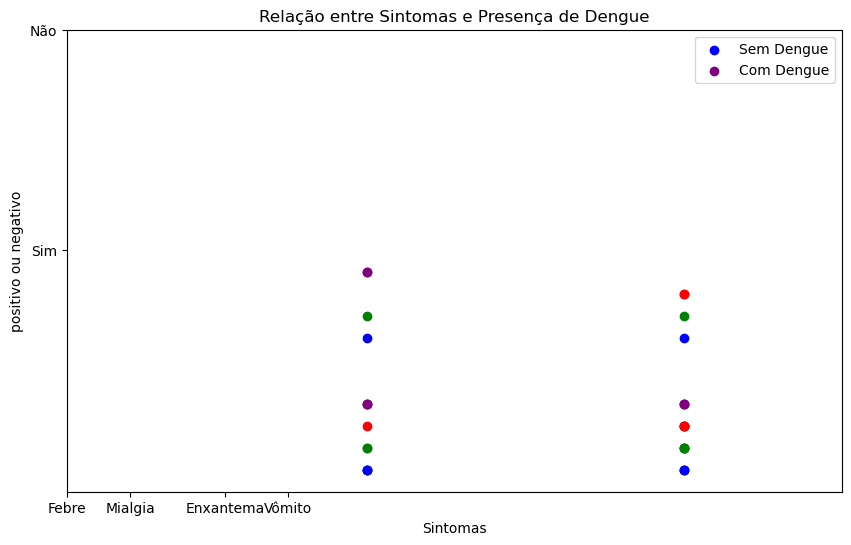

In [91]:
febre = [2, 2, 2, 1, 1, 1, 2, 1, 1, 2,2]
mialgia = [2, 2, 2, 2, 1, 2, 1, 1, 2, 2]
vomito = [2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1]  
enxantema = [2, 2, 2, 2, 2, 2, 2, 1, 2, 2]
resultado_revisto = [2, 2, 2, 1, 2, 2, 1, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

indices_sem_dengue = [i for i, resultado in enumerate(resultado_revisto) if resultado == 2]
indices_com_dengue = [i for i, resultado in enumerate(resultado_revisto) if resultado == 1]

plt.scatter([febre[i] for i in indices_sem_dengue], [0] * len(indices_sem_dengue), color='blue', label='Sem Dengue')
plt.scatter([mialgia[i] for i in indices_sem_dengue], [0.1] * len(indices_sem_dengue), color='green')
plt.scatter([enxantema[i] for i in indices_sem_dengue], [0.2] * len(indices_sem_dengue), color='red')
plt.scatter([vomito[i] for i in indices_sem_dengue], [0.3] * len(indices_sem_dengue), color='purple')


plt.scatter([febre[i] for i in indices_com_dengue], [0.6] * len(indices_com_dengue), color='blue')
plt.scatter([mialgia[i] for i in indices_com_dengue], [0.7] * len(indices_com_dengue), color='green')
plt.scatter([enxantema[i] for i in indices_com_dengue], [0.8] * len(indices_com_dengue), color='red')
plt.scatter([vomito[i] for i in indices_com_dengue], [0.9] * len(indices_com_dengue), color='purple', label='Com Dengue')


plt.xlim(0.5, 2.5)
plt.ylim(-0.1, 1.0)
plt.yticks([1, 2], ['Sim', 'Não'])
plt.xticks([0.05, 0.25, 0.55, 0.75], ['Febre', 'Mialgia', 'Enxantema', 'Vômito'])
plt.ylabel('positivo ou negativo')
plt.xlabel('Sintomas')
plt.title('Relação entre Sintomas e Presença de Dengue')
plt.legend()
